In [3]:
import numpy as np
from sunpy.map import Map
import os
import astropy.units as u
from astropy.coordinates import SkyCoord
from matplotlib import pyplot as plt
from astropy.visualization import ImageNormalize, LinearStretch, LogStretch

In [4]:


path_data = "C:/Users/adolliou/PycharmProjects/report_issue_github/data/sunpy_reprojection_issue"
# aiamap = Map(os.path.join(path_data, "aia.lev1.171.1497617052.2022-03-17T00_22_03.342Z.image_lev1.fits"))
# hrimap = Map(os.path.join(path_data, "solo_L2_eui-hrieuvopn-image_20220317T001800215_V02.fits"))

aiamap = Map("https://git.ias.u-psud.fr/adolliou/report_issue_github.git/info/lfs/aia.lev1.171.1497617052.2022-03-17T00_22_03.342Z.image_lev1.fits?ref_type=heads")
hrimap = Map("https://git.ias.u-psud.fr/adolliou/report_issue_github.git/info/lfs/solo_L2_eui-hrieuvopn-image_20220317T001800215_V02.fits?ref_type=heads")

bottom_left = SkyCoord(hrimap.bottom_left_coord, frame=hrimap.coordinate_frame)
top_right = SkyCoord(hrimap.top_right_coord, frame=hrimap.coordinate_frame)

norm = ImageNormalize(vmin=0, vmax=3000, stretch=LogStretch())


fig = plt.figure()
ax = fig.add_subplot(projection=aiamap)
im = aiamap.plot(axes=ax, norm=norm)
aiamap.draw_quadrangle(bottom_left=bottom_left, top_right=top_right, edgecolor="r")
fig.colorbar(im)
plt.show()


outmap = hrimap.reproject_to(aiamap.wcs, algorithm="interpolation")
outmap.peek()



outmap = aiamap.reproject_to(hrimap.wcs, algorithm="interpolation")
outmap.peek()

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

OSError: Failed to read C:\Users\adolliou\AppData\Local\sunpy\sunpy\Cache\aia.lev1.171.1497617052.2022-03-17T00_22_03.342Z.image_lev1.fits
No SIMPLE card found, this file does not appear to be a valid FITS file. If this is really a FITS file, try with ignore_missing_simple=True
 If you want to bypass these errors, pass `allow_errors=True`.

## Binning HRI map

hrimap.data.shape=(2048, 2048)


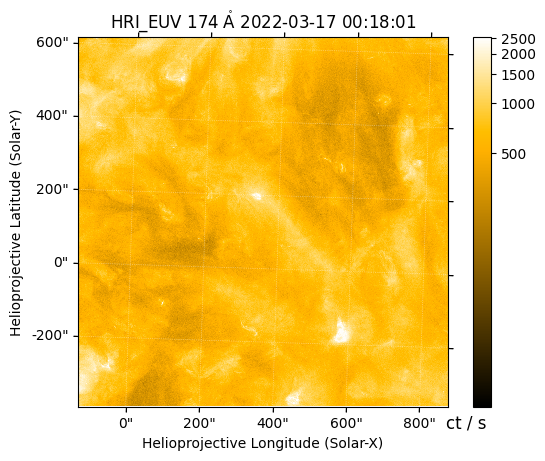

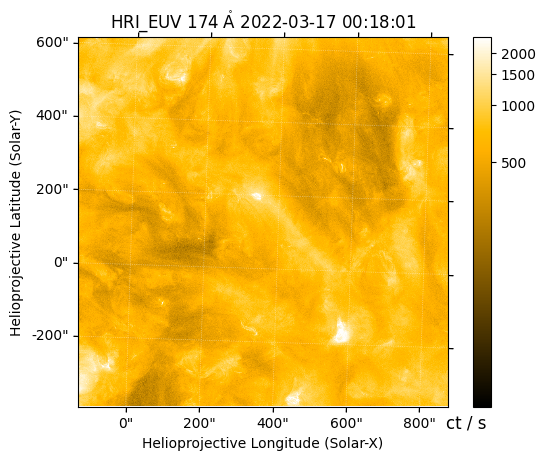

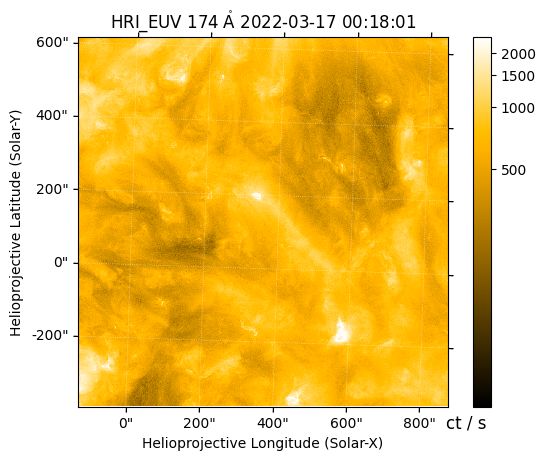

In [70]:
print(f'{hrimap.data.shape=}')
hrimap.peek()
new_shape = [1500 , 1500]* u.pixel
hrimap_bin_1500 = hrimap.resample(new_shape)
hrimap_bin_1500.peek()


new_shape = [600 , 600]* u.pixel
hrimap_bin_600 = hrimap.resample(new_shape)
hrimap_bin_600.peek()


## Reproject AIA image to binned HRI Image

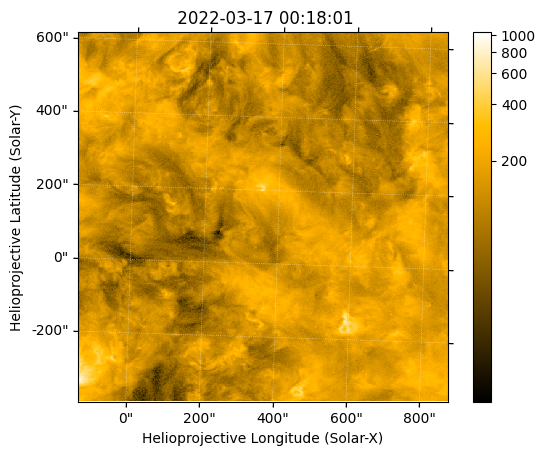

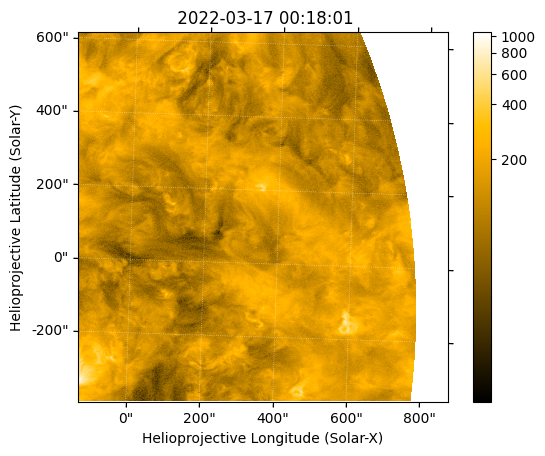

In [71]:
outmap_600 = aiamap.reproject_to(hrimap_bin_600.wcs)
outmap_600.peek()

outmap_1500 = aiamap.reproject_to(hrimap_bin_1500.wcs)
outmap_1500.peek()
